In [83]:
import os, sys, time

sys.path
sys.path.append('./')

import numpy as np

from astropy.io.fits import getdata
from astropy import wcs
from astropy.io import fits
from astropy import units as u
from astropy import constants as con
from astropy.coordinates import SkyCoord

import matplotlib
matplotlib.use('PDF')
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# import aplpy

from scipy.optimize import curve_fit

In [84]:
    def plot_spectra(
                     freq_array      = np.array([]), 
                     intensity_array = np.array([]),
                     figsize         = (6,4),
                     xlabel        = 'Frequency [GHz]'    , xlabel_size = 12, xscale = 'linear',
                     ylabel        = 'Intensity [Jy/beam]', ylabel_size = 12, yscale = 'linear',
                     fontsize      = 12, 
                     plot_ticks     = True,
                       xtick_size = 12, ytick_size = 12,
                     outPDF_filename = 'none',
                     verbose = False
                    ):
        '''
        This is a function to plot 1D spectra.
        
        Input:
            freq_array [1D numpy array] : store the coordinate values in the frequency axis.
            intensity_array [1D numpy array] : store the coordinate values in the intensity axis.
            figsize : the x,y size of 1D figure
            xlabel : the label name of x-axis
            xlabel_size : the size of x label
            xscale : the scale of x-components
            xlim : limit of x-components on the axis
            ylabel : the label name of y-axis
            ylabel_size : the size of y label
            yscale : the scale of y-components
            ylim : limit of y-components on the axis
            fontsize : the size of font
            plot_ticks : the boolean of plotting ticks
             xtick_size : the size of x-ticks
             ytick_size : the size of y-ticks
            outPDF_filename : the name of output PDF file
            
            
        Keywords:
        
        Output:
        
        Example: 
            x = np.array([1, 2, 3, 4, 5])
            y = np.array([1, 1, 3, 3, 1])
            plot_spectra(x, y)
        '''
        
        if verbose == True:
            print('Plotting 1D spectra')
            
  
        # Initializing figure
        fig = plt.figure(
                         figsize = (figsize[0], figsize[1])
                        )
        ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])
        
        # Set the x/y axis title and legend
        plt.xlabel(xlabel, size = xlabel_size)
        plt.ylabel(ylabel, size = ylabel_size)

        # set plot scale
        plt.xscale(xscale)
        plt.yscale(yscale)
        
        # set label fontsizes
        plt.rc('font', size = fontsize)            # controls default text sizes
        plt.rc('xtick', labelsize = xtick_size)    # fontsize of the tick labels
        plt.rc('ytick', labelsize = ytick_size)    # fontsize of the tick labels
        if (plot_ticks != True):
            fig.axis_labels.hide_x()
            fig.axis_labels.hide_y()
            fig.tick_labels.hide_x()
            fig.tick_labels.hide_y()

        # plot the data
        plt.plot(freq_array, intensity_array,
                 '-', # symbol shape
                 color=(0.7,0.7,0.2, 0.3), # (R, G, B, transparency), ranged between [0, 1]
                 linewidth = 2.0, 
                 label = "TBD"
                )
                    
        # Setting the figure legend 
        plt.legend(loc=1, fontsize = fontsize)
        
    

        if outPDF_filename != 'none':
            fig.save(outPDF_filename, transparent=True)

In [91]:
def gaussian(freq_array, mean, stddev):
    '''
    To return gaussian function which used in fitting
    
    Input:
        freq_array [1D numpy array] :
        mean [double] : 
        stddev [double] : standard deviation of y components
        
    Return:
        y [double] : the fitted intensity array
    '''
    intensity_array = (1 / (stddev * np.sqrt(2 * np.pi) ))* np.exp(-0.5 * ((freq_array - mean) / stddev) ** 2)
    
    return intensity_array


def chisquare(y, y_err, ymodel):
    '''
    Return the chi-square given the measurements of y, y-error, and a model of the measurements y.
    
    Input:
        y [np array]      : measurements
        y_err [np array]  : measurement errors
        ymodel [np array] : a model of y 
    
    Return:
        chisquare [double] : the chi-square value
    
    '''
    
    return np.sum( ( (y - ymodel) / y_err)**2 )



def fit_1dgaus( 
                freq_array = np.array([]), 
                intensity_array = np.array([]),
                xscale = 'linear', xlabel = 'Frequency [GHz]', xlabelsize = 12.0, xmin = 255.9 , xmax = 256.7,
                yscale = 'linear', ylabel = 'Intensity [Jy/beam]', ylabelsize = 12.0, ymin = -0.03 , ymax = 0.11,
                y_err  = 0.0073789516,
                figsize = (8, 8),
                fontsize = 10, 
                xtick_size = 12.0, ytick_size=12.0,
                markersize = 0.01,
              ):
    '''
    This is a function to do 1d gaussian fiiting
    
    Input:
    xscale : scale of x components
    yscale : scale of y components
    xlabel : label of x-axis
    ylabel : label of y-axis
    xlabelsize : size of x-axis label
    ylabelsize : size of y-axis label
    y_err : the measurement error of y-components (by calculating the standard deviation)
    figsize : size of figure
    markersize : size of marker on the figure
    color : color
    xtick_size : fontsize of the x-tick labels
    ytick_size : fontsize of the y-tick labels
    
    
    Example:
    freq_array = np.arange(1,100,1)
    stddev = np.std(freq_array)
    mean = sum(freq_array)/len(freq_array)
    intensity_array = gaussian(freq_array,mean = mean, stddev = stddev)
    plt.plot(freq_array,intensity_array)
    
    '''
    
     # transform the arrays to csv
    data = {'x': freq_array,
            'y': intensity_array,
             }
    
    
    df = pd.DataFrame(data)
    #print(df)

    filename = 'spectra.csv'
    os.system('rm -rf ' + filename)
    df.to_csv(filename, index=False)

 
    # read data from csv file
    path = './'
    df_read = pd.read_csv(path + filename)
    
    # tranform the y_err to the form of DataFrame
    y_err = [0.0073789516] * len(df_read)
    df_read['y_err'] = y_err
    

    popt, pcov = curve_fit(gaussian, # function that is the model
                           df_read.x, df_read.y, # x and y values of the data
                           sigma = df_read['y_err'] # standard measurement error
                          )

    # evaluating the uncertainties of fit parameters from the covariant matrix
    perr = np.sqrt(np.diag(pcov))
    print(perr)
    

    print('Best-fit a: ', popt[0], '  Best-fit b: ', popt[1])
    print('a error: ', perr[0], '  b error :', perr[1])

    
    # plotting data and model

    ############ Initializing Figure #################################
    fig = plt.figure(
                        figsize = (figsize[0], figsize[1])
                    )
    ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])
    
    ax.set_xlim(xmin, xmax)  # Set the minimum and maximum values for the x-axis
    ax.set_ylim(ymin, ymax)  # Set the minimum and maximum values for the y-axis

    # Set the x/y axis title and legend
    plt.xlabel( xlabel, size = xlabelsize )
    plt.ylabel( ylabel, size = ylabelsize )

    plt.xscale(xscale)
    plt.yscale(yscale)
    
    plt.rc('font', size = fontsize)      # controls default text sizes
    plt.rc('xtick', labelsize = xtick_size)    # fontsize of the tick labels
    plt.rc('ytick', labelsize = ytick_size)    # fontsize of the tick labels
    ##################################################################


    # plot data
    plt.plot(df_read.x, df_read.y,
             'o', markersize,
             color = (0.7, 0.3, 0.3, 0.7),
             label = "spectra data"
            )

    # plot model
    x_sort = np.sort(df_read.x)
    ymodel = gaussian(x_sort, popt[0], popt[1])
    plt.plot(x_sort, ymodel,
             '-', linewidth = 2.0,
             color = (0.1, 0.3, 0.7, 0.7),
             label = "Best-fit model"
            )
    chi2 = chisquare(df_read.y, df_read['y_err'], gaussian(df_read.x, popt[0], popt[1]) )


    # text labeling
    label_string = 'best-fit: y = ' + str( round(popt[0], 2) ) + r'$\pm$' + str( round(perr[0], 2) ) + 'x' + \
                              ' +' + str( round(popt[1], 2) ) + r'$\pm$' + str( round(perr[1], 2) )
    plt.text(0.60, 0.9, # location of the text label
             label_string, # content of the label
             color = (0.1, 0.3, 0.7, 0.7),
             verticalalignment = 'bottom', horizontalalignment = 'left',
             transform = ax.transAxes, # use relative coordinates
             fontsize = fontsize)

    label_string = 'Chi-square: ' + str( round(chi2, 2) )
    plt.text(0.60, 0.85, 
             label_string,
             color = (0.1, 0.3, 0.7, 0.7),
             verticalalignment = 'bottom', horizontalalignment = 'left',
             transform = ax.transAxes,
             fontsize = fontsize)
    
    num_x = len(df_read.x)
    label_string = 'Degree of freedom: ' + str( num_x - len(popt) )
    plt.text(0.60, 0.80, 
             label_string,
             color = (0.1, 0.3, 0.7, 0.7),
             verticalalignment = 'bottom', horizontalalignment = 'left',
             transform = ax.transAxes,
             fontsize = fontsize)

    # Setting the figure legend 
    plt.legend(loc=2, fontsize = fontsize)

    # PDF file output
    plt.savefig('scipy_modeldata_1dpoly.pdf', 
                transparent = True
               )

In [92]:
# general functions
'''

def fit_1dgaus():
    
    #This is a general use function to fit 1D Gaussian profile.
    
    print('Fitting 1D  gaussian')
    
'''
    

        

# defining classes
class spectraAna:
    '''
    Class for analyzing image cube. The main purpose of this analysis is to
    stack the un-redshifted/blueshifted spectra.
    
    '''
    
    ### Constructor and destructor
    def __init__(self, fitscubename = ' '):
        self.fitscubename = fitscubename
    
    def __def__(self):
        pass
    
    
    ##function

    ### Methods in this class
    def readfits(self, verbose = False):
        '''
        The task to read the FITS image cube to memory.
        '''
        if verbose == True:
            print('This is the program to read FITS image cube')
            
        if self.fitscubename != ' ':
            if verbose == True:
                print('Reading FITS image cube :' + self.fitscubename)
        
        # import FITS image to HDU
        self.Ihdu = fits.open(fitscubename)
        
        # choose the certain information
        self.naxis3 = self.Ihdu[0].header['naxis3']
        self.crpix3 = self.Ihdu[0].header['crpix3']
        self.cdelt3 = self.Ihdu[0].header['cdelt3']
        self.crval3 = self.Ihdu[0].header['crval3']
        hduwcs = wcs.WCS(self.Ihdu[0].header)
        
    def get_velocity(self, verbose = False):
        '''
        The task to fit centroid velocity pixel-by-pixel and store to a 2D numpy array.
        
        Input:
        
        Return:
        
        '''
        if verbose == True: 
            print('Fitting centroid velocities')
            
        fit_1dgaus(freq_array/1e9, intensity_array)
            
        # self.velocity_map = np.array()
        
        
    def write_velocity(self, outfile = 'velocity_map.txt', verbose = False):
        '''
        Output velocity map to an ASCII file.
        
        Input:
            outfile [string] : default: velocity_map.txt
        
        '''
        
        if verbose == True:
            print('Outputing velocity map to an ASCII file')
     
    
    def unrbshift_spectra(self, verbose = False):
        '''
        unredshift/blueshift spectra
        '''
        
        if verbose == True:
            print('Unredshifting/blueshifting spectra')
        
        
            
            
    def stack_spectra(self, verbose = False):
        '''
        The task to stack the unredshifted/unblueshifted spectra and plot the stacked spectra
        '''
        
        if verbose == True:
            print('Stacking the unredshifted/unblueshifted spectra')

/home/tcc/software/Anaconda3/anaconda3/envs/astroimgAna/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[inf inf]
Best-fit a:  1.0   Best-fit b:  1.0
a error:  inf   b error : inf


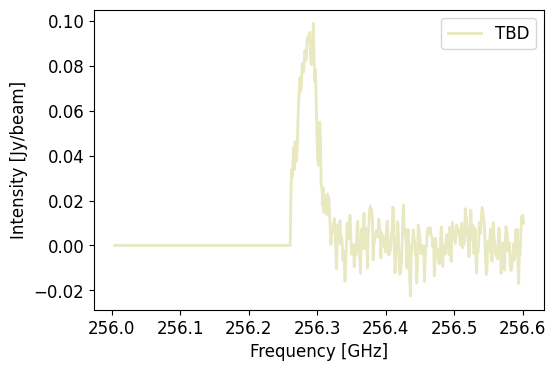

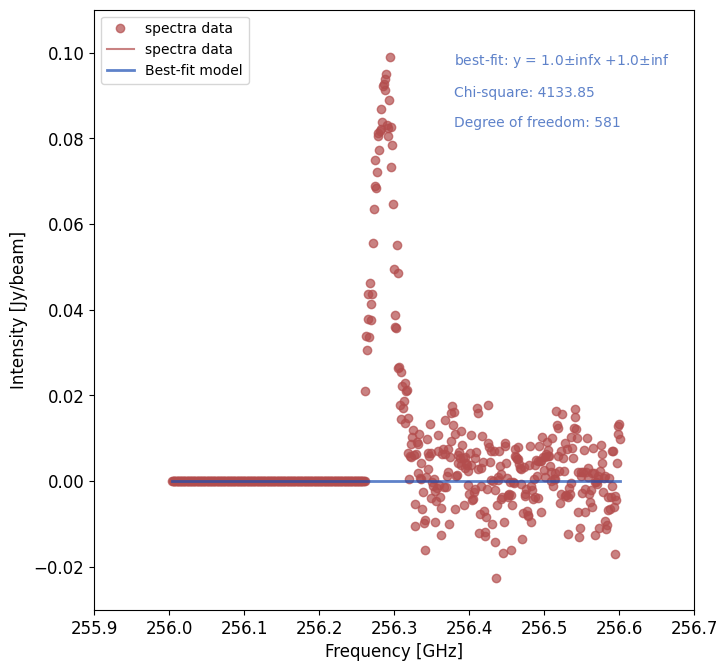

In [93]:
## Useful function #####################################################
# plot spectra

# fit spectra (to derive centroid velocity)


############ Major flow of data analysis ###############################

## Open FITS image cube
fitscubename = '/home/tcc/DATA/GC_Dspecies/ancillary/H29alpha_7m+12m_natural.image.fits'
myAnalysis = spectraAna(fitscubename = fitscubename)
myAnalysis.readfits(verbose = False)
ypix = 523
xpix = 425
intensity_array =  myAnalysis.Ihdu[0].data[0][:, ypix, xpix]

naxis3     = myAnalysis.naxis3
crpix3     = myAnalysis.crpix3
cdelt3     = myAnalysis.cdelt3
crval3     = myAnalysis.crval3 
freq_array = np.zeros( naxis3 )
freq_array = crval3 + ( np.arange(naxis3) + 1 - crpix3 ) * cdelt3
#print(freq_array)

plot_spectra( freq_array/1e9, intensity_array )

## Loop over all spatial pixels and fit the centroid velocity
myAnalysis.get_velocity(verbose = False)

## Output the 2D centroid-velocity map (?)
myAnalysis.write_velocity()

## Based on the 2D centroid-velocity map to un-redshift/blueshift spectra
myAnalysis.unrbshift_spectra()

## stack spectra
myAnalysis.stack_spectra()


In [88]:
# https://splatalogue.online//
CI_restfreq = 492.16065100          # GHz
HCOplus3to2_restfreq = 267.55762590 # GHz

This is the program to read FITS image cube
Reading FITS image cube :/home/tcc/DATA/GC_Dspecies/ancillary/H29alpha_7m+12m_natural.image.fits
(583,)
31 324


indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

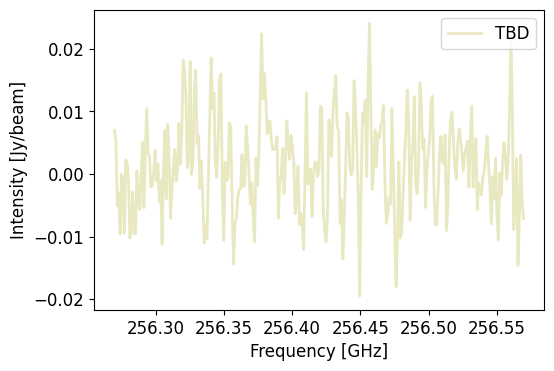

In [89]:
# Open FITS image cube
fitscubename = '/home/tcc/DATA/GC_Dspecies/ancillary/H29alpha_7m+12m_natural.image.fits'
myAnalysis = spectraAna(fitscubename = fitscubename)
myAnalysis.readfits(verbose = True)
ypix = 495
xpix = 425
intensity_array =  myAnalysis.Ihdu[0].data[0][:, ypix, xpix]


naxis3     = myAnalysis.naxis3
crpix3     = myAnalysis.crpix3
cdelt3     = myAnalysis.cdelt3
crval3     = myAnalysis.crval3 
freq_array = np.zeros( naxis3 )
freq_array = crval3 + ( np.arange(naxis3) + 1 - crpix3 ) * cdelt3

print(np.shape(freq_array))


freqGHz_start = 256.57
freqGHz_end   = 256.27

freq_startpix = round( ( freqGHz_start*1e9 - crval3 )/cdelt3 + crpix3 )
freq_endpix = round( ( freqGHz_end*1e9 - crval3 )/cdelt3 + crpix3 )

print(freq_startpix, freq_endpix)

# print(freq_array)
plot_spectra( freq_array[freq_startpix:freq_endpix]/1e9, intensity_array[freq_startpix:freq_endpix])


In [90]:
## calculate the standard deviation as measurement errors (y_err)
std = np.std(intensity_array[freq_startpix:freq_endpix])
print(std)

0.0073789516
